In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

IRSA = cv.imread('imagenes/IRS/IRS_A_1-1_PAN.png')

b1 = cv.imread('imagenes/NOAA/NOAA_1-5_R.png', cv.IMREAD_GRAYSCALE)
b2 = cv.imread('imagenes/NOAA/NOAA_2-5_NIR.png', cv.IMREAD_GRAYSCALE)
b3 = cv.imread('imagenes/NOAA/NOAA_3-5_SWIR.png', cv.IMREAD_GRAYSCALE)
NOAA = cv.merge((b1,b2,b3))

# Ejercicio 3

Comprobación de la función isodata en imagenes reales.

In [2]:
# Función isodata
def isodata(img, C):
    
    v = np.zeros( (C, img.shape[2]) )
    
    v = comienzo(v)
       
    resimg = np.ones( (img.shape[0], img.shape[1]), dtype = int)
    
    res = True
    while res:
        
        resimg, lc = clasificacion(img,v,resimg)
        
        vp = v.copy()
        
        for i in range(len(lc)):
            if len(lc[i]) > 0:
                v[i] = reasignacion(lc[i])
                
        mod = True
        for j in range(v.shape[0]):
            for k in range(v.shape[1]):
                mod = mod and (vp[j][k] - v[j][k]) == 0
        
        if mod:
            res = False
    
    return resimg

# Función para generar los casos base de los centroides

def comienzo(v):
    
    for i in range(v.shape[0]):
        v[i,:] = (random.randint(0,255),
                  random.randint(0,255),
                  random.randint(0,255))
    
    return v

# Función para clasificar cada pixel

def clasificacion(img,centros,resimg):
    
    lc = list()
    for z in range(centros.shape[0]):
        lc.append(list())
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j][0] == 0 and img[i,j][1] == 0 and img[i,j][2] == 0:
                resimg[i,j] = 0
            else:
                dist = list()
                for v in centros:
                    d = np.sqrt((np.power((img[i][j][0]-v[0]),2))
                                 +(np.power((img[i][j][1]-v[1]),2))
                                 +(np.power((img[i][j][2]-v[2]),2)))
                    dist.append(d)

                c = dist.index(min(dist))
                
                lc[c].append((img[i,j][0],img[i,j][1],img[i,j][2]))
                resimg[i,j] = c+1
                
    return resimg, lc


# Función para reasignar valores a los centros de clasificación
def reasignacion(c):
    
    medC1 = 0
    medC2 = 0
    medC3 = 0
    
    for t in c:
        medC1 += t[0]
        medC2 += t[1]
        medC3 += t[2]
        
    medC = (medC1/len(c),medC2/len(c),medC3/len(c))
    
    return medC

In [3]:
# Colorea con un seudocolor el resultado de la clasificación.
# Función seudo
def seudo(img):
    
    resimg = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                resimg[i,j,:] = [255,0,0]
            elif img[i,j] == 1:
                resimg[i,j,:] = [0,255,0]
            elif img[i,j] == 2:
                resimg[i,j,:] = [0,0,255]
            elif img[i,j] == 3:
                resimg[i,j,:] = [255,255,0]
            elif img[i,j] == 4:
                resimg[i,j,:] = [0,255,255]
            elif img[i,j] == 5:
                resimg[i,j,:] = [255,0,255]
            else:
                resimg[i,j,:] = [0,0,0]
                
    return resimg

In [4]:
iso_IRSA = isodata(IRSA,2)
seudo_IRSA = seudo(iso_IRSA)

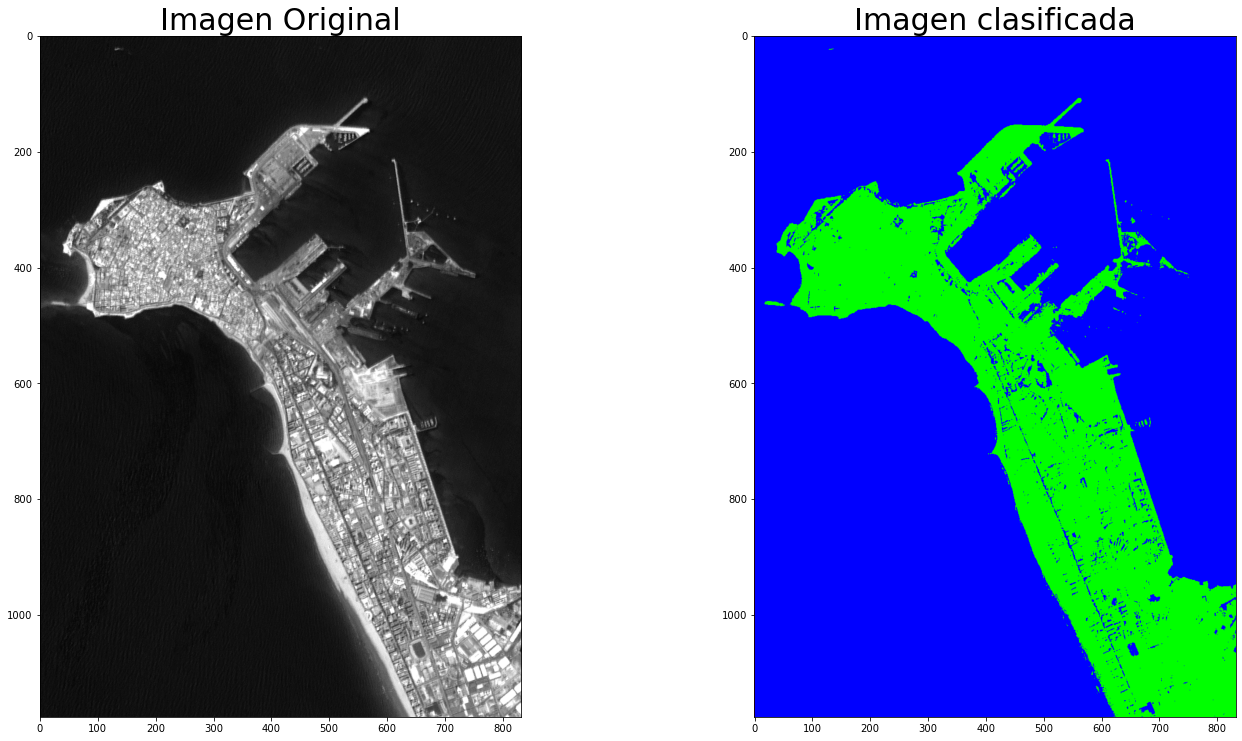

In [5]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(IRSA)
plt.title("Imagen Original", fontsize = 30)
plt.subplot(2, 2, 2)
plt.imshow(seudo_IRSA)
plt.title("Imagen clasificada", fontsize = 30)
plt.tight_layout()
plt.show()

In [6]:
iso_NOAA = isodata(NOAA,3)
seudo_NOAA = seudo(iso_NOAA)

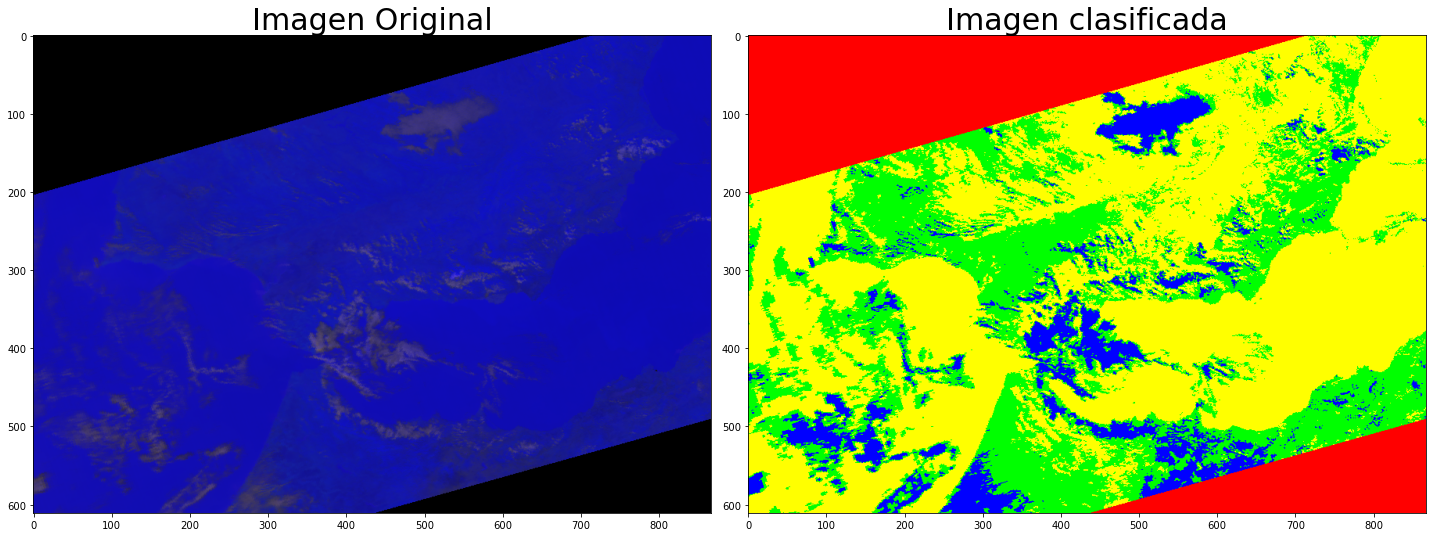

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(NOAA)
plt.title("Imagen Original", fontsize = 30)
plt.subplot(2, 2, 2)
plt.imshow(seudo_NOAA)
plt.title("Imagen clasificada", fontsize = 30)
plt.tight_layout()
plt.show()

In [8]:
cv.imwrite("soluciones/Ej3 - Isodata IRS A.png",cv.cvtColor(seudo_IRSA, cv.COLOR_BGR2RGB))
cv.imwrite("soluciones/Ej3 - Isodata NOAA.png",cv.cvtColor(seudo_NOAA, cv.COLOR_BGR2RGB))

True